Author: Mohsen Ghazel (mghazel)
* Date: April 6th, 2021

# **Project: CIFAR-10 Classification using Convolutional Neural Networks (CNN):**

The objective of this project is to demonstrate how to develop a Convolutional Neural Network (CNN) to classify images from 10 different typical object classes, using the CIFAR-10 dataset:

* A high-level description of the CIFAR-10 dataset is as follows:
  * It contains 60000 color images, with size 32x32 pixels, 
  * The objects in the images are in the following10 classes:
    * Airplane
    * Automobile
    * Bird
    * Cat
    * Deer
    * Dog
    * Frog
    * Horse
    * Ship
    * Truck.
  * It has 6000 images per class. 
    * There are 50000 training images
    * There are 10000 test images
  * Additional detailed about the Fashion can be found here:
    * https://www.cs.toronto.edu/~kriz/cifar.html

* We shall apply the standard Machine and Deep Learning model development and evaluation process, with the following steps:

  1. Load the CIFAR-10 dataset
  2. Build a simple CNN model
  3. Train the selected ML model
  4. Deploy the trained on the test data 
  5. Evaluate the performance of the trained model using evaluation metrics:
    *    Accuracy
    *    Confusion Matrix
    *    Other metrics derived form the confusion matrix.

##**Part 1: Imports and Global Variables :**

###**1.1) Standard scientific Python imports:**

In [1]:
# Numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
# - import sklearn to use the confusion matrix function
from sklearn.metrics import confusion_matrix
# import itertools
import itertools
# opencv
import cv2
# tensorflow
import tensorflow as tf

# keras input layer
from tensorflow.keras.layers import Input
# keras conv2D layer
from tensorflow.keras.layers import Conv2D
# keras MaxPooling2D layer
from tensorflow.keras.layers import MaxPooling2D
# keras Dense layer
from tensorflow.keras.layers import Dense
# keras Flatten layer
from tensorflow.keras.layers import Flatten
# keras Dropout layer
from tensorflow.keras.layers import Dropout
# batch-normalization
from tensorflow.keras.layers import BatchNormalization
# global-max-pooling
from tensorflow.keras.layers import GlobalMaxPooling2D

# keras model
from tensorflow.keras.models import Model
# keras sequential model
from tensorflow.keras.models import Sequential
# optimizers
from tensorflow.keras.optimizers import SGD

# random number generators values
# seed for reproducing the random number generation
from random import seed
# random integers: I(0,M)
from random import randint
# random standard unform: U(0,1)
from random import random
# time
import datetime
# I/O
import os
# sys
import sys

# check for successful package imports and versions
# python
print("Python version : {0} ".format(sys.version))
# OpenCV
print("OpenCV version : {0} ".format(cv2.__version__))
# numpy
print("Numpy version  : {0}".format(np.__version__))
# tensorflow
print("Tensorflow version  : {0}".format(tf.__version__))

Python version : 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0] 
OpenCV version : 4.1.2 
Numpy version  : 1.19.5
Tensorflow version  : 2.4.1


###**1.2) Global variables:**

In [2]:
# -set the random_state seed = 100 for reproducibilty
random_state_seed = 100

# the number of visualized images
num_visualized_images = 25

##**Part 2: Load CIFAR-10 Dataset**
###**2.1) Load the CIFAR-10dataset :**
* Load the CIFAR-10T dataset of clothing-articles:
  * A high-level description of the CIFAR-10 dataset is as follows:
    * It contains 60000 color images, with size 32x32 pixels, 
    * The objects in the images are in the following10 classes:
      * Airplane
      * Automobile
      * Bird
      * Cat
      * Deer
      * Dog
      * Frog
      * Horse
      * Ship
      * Truck.
    * It has 6000 images per class. 
      * There are 50000 training images
      * There are 10000 test images
    * Additional detailed about the Fashion can be found here:
      * https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
# Load in the CIFAR10 data set
# - It has 10 classes
cifar10 = tf.keras.datasets.cifar10
# extract the training and testing subsets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


###**2.2) Explore training and test images:**

####**2.2.1) Display the number and shape of the training and test subsets:**

In [4]:
#------------------------------------------------------
# Training data:
#------------------------------------------------------
# the number of training images
num_train_images = x_train.shape[0]
print("----------------------------------------------")
print("Training data:")
print("----------------------------------------------")
print("x_train.shape: ", x_train.shape)
print("Number of training images: ", num_train_images)
print("Image size: ", x_train.shape[1:])

#------------------------------------------------------
# Test data:
#------------------------------------------------------
# the number of test images
num_test_images = x_test.shape[0]
print("----------------------------------------------")
print("Test data:")
print("----------------------------------------------")
print("x_test.shape: ", x_test.shape)
print("Number of test images: ", num_test_images)
print("Image size: ", x_test.shape[1:])
print("----------------------------------------------")

----------------------------------------------
Training data:
----------------------------------------------
x_train.shape:  (50000, 32, 32, 3)
Number of training images:  50000
Image size:  (32, 32, 3)
----------------------------------------------
Test data:
----------------------------------------------
x_test.shape:  (10000, 32, 32, 3)
Number of test images:  10000
Image size:  (32, 32, 3)
----------------------------------------------


####**2.2.2) Reshape the training and test target vectors:**
* Convert the y_train and y_test to 1-dimensional vectors

In [5]:
# flatten the y_train targets vector to convert to 1-dimensional
y_train = y_train.flatten()

# flatten the y_test targets to convert to 1-dimensional
y_test = y_test.flatten()


####**2.2.3) Display the targets/classes:**

*   There 10 classes
*   Each training and test example is assigned to one of the following labels:

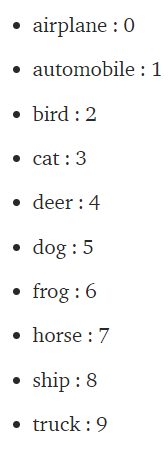




####**2.2.3.1) Display the number of classes**

In [6]:
# Display the number of classes:
num_classes = len(set(y_train))
print('-------------------------------------------------')
print("The number of classes in the CIFAR dataset = ", num_classes)
print('-------------------------------------------------')

-------------------------------------------------
The number of classes in the CIFAR dataset =  10
-------------------------------------------------


####**2.2.3.2) Create meaningful labels for the different classes:**

In [7]:
# the labels mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()
# display the class labels
for counter in range(num_classes):
  print('Class ID = {}, Class name = {}'.format(counter, labels[counter]))

Class ID = 0, Class name = airplane
Class ID = 1, Class name = automobile
Class ID = 2, Class name = bird
Class ID = 3, Class name = cat
Class ID = 4, Class name = deer
Class ID = 5, Class name = dog
Class ID = 6, Class name = frog
Class ID = 7, Class name = horse
Class ID = 8, Class name = ship
Class ID = 9, Class name = truck


####**2.2.4) Examine the number of images for each class of the training and testing subsets:**

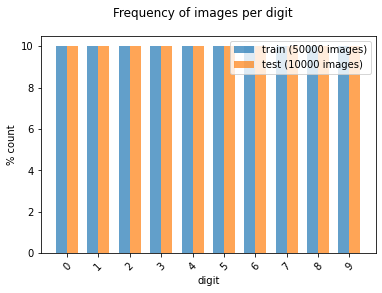

In [8]:
# create a histogram of the number of images in each class/digit:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('digit')
    plt.ylabel(ylabel_text)
 
plt.suptitle('Frequency of images per digit')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} images)'.format(len(y_train)), 
    'test ({0} images)'.format(len(y_test)), 
]);

####**2.2.5) Visualize some of the training and test  images and their associated targets:**

* First implement a visualization functionality to visualize the number of randomly selected images:

In [9]:
"""
# A utility function to visualize multiple images:
"""
def visualize_images_and_labels(num_visualized_images = 25, dataset_flag = 1):
  """To visualize images.

      Keyword arguments:
         - num_visualized_images -- the number of visualized images (deafult 25)
         - dataset_flag -- 1: training dataset, 2: test dataset
      Return:
         - None
  """
  #--------------------------------------------
  # the suplot grid shape:
  #--------------------------------------------
  num_rows = 5
  # the number of columns
  num_cols = num_visualized_images // num_rows
  # setup the subplots axes
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 10))
  # set a seed random number generator for reproducible results
  seed(random_state_seed)
  # iterate over the sub-plots
  for row in range(num_rows):
      for col in range(num_cols):
        # get the next figure axis
        ax = axes[row, col];
        # turn-off subplot axis
        ax.set_axis_off()
        #--------------------------------------------
        # if the dataset_flag = 1: Training data set
        #--------------------------------------------
        if ( dataset_flag == 1 ): 
          # generate a random image counter
          counter = randint(0,num_train_images)
          # get the training image
          image = np.squeeze(x_train[counter,:])
          # get the target associated with the image
          label = labels[y_train[counter]]
        #--------------------------------------------
        # dataset_flag = 2: Test data set
        #--------------------------------------------
        else: 
          # generate a random image counter
          counter = randint(0,num_test_images)
          # get the test image
          image = np.squeeze(x_test[counter,:])
          # get the target associated with the image
          label = labels[y_test[counter]]
        #--------------------------------------------
        # display the image
        #--------------------------------------------
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        # set the title showing the image label
        ax.set_title(str(label), size = 8)

#####**2.2.5.1) Visualize some of the training images and their associated targets:**

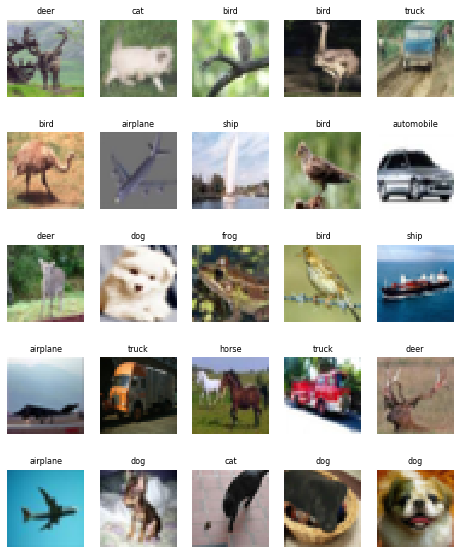

In [10]:
# call the function to visualize the training images
visualize_images_and_labels(num_visualized_images, 1)

#####**2.2.5.2) Visualize some of the test images and their associated targets:**

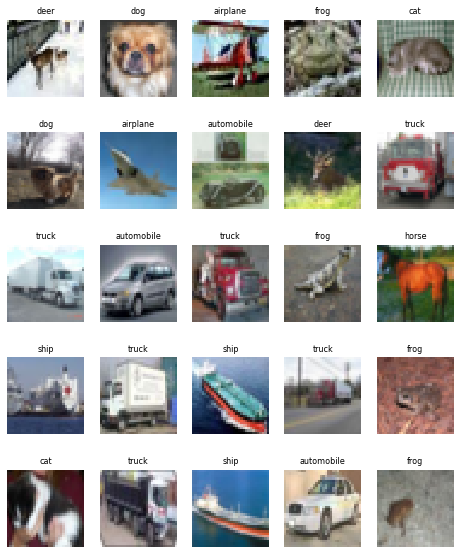

In [11]:
# call the function to visualize the test images
visualize_images_and_labels(num_visualized_images, 2)

###**2.3) Normalize the training and test images to the interval: [0, 1]:**

In [12]:
# Normalize the training images
x_train = x_train / 255.0
# Normalize the test images
x_test = x_test / 255.0

##**Part 3: Build the CNN model architecture:**

###**3.1: Develop the structure of the CNN model to classify the CIFAR-10 images.**

In [13]:
#-------------------------------------------------------------------------------
# Build the sequential CNN model
#-------------------------------------------------------------------------------
# Build the model using the functional API
#-------------------------------------------------------------------------------
# Layer # 1: Input layer
#-------------------------------------------------------------------------------
# - input images size: (28, 28, 3)
#-------------------------------------------------------------------------------
i = Input(shape=x_train[0].shape)   
#-------------------------------------------------------------------------------
# Layer # 2: Convolutional layer
#-------------------------------------------------------------------------------
# - 32 filters:  
#   - size: 3x3
#   - same
#   - stride = 1 
# - Activation function: relu
#------------------------------------------------------------------------------- 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i) 
#-------------------------------------------------------------------------------
# Layer # 3: Batch normalization
#-------------------------------------------------------------------------------              
x = BatchNormalization()(x)   
#-------------------------------------------------------------------------------
# Layer # 4: Convolutional layer
#-------------------------------------------------------------------------------
# - 32 filters:  
#   - size: 3x3
#   - same
#   - stride = 1 
# - Activation function: relu
#------------------------------------------------------------------------------- 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
#-------------------------------------------------------------------------------
# Layer # 5: Batch normalization
#-------------------------------------------------------------------------------              
x = BatchNormalization()(x)  
#-------------------------------------------------------------------------------
# Layer # 6: Max-pooling layer
#-------------------------------------------------------------------------------
# - Max-pooling  
#   - size: 2x2
#------------------------------------------------------------------------------- 
x = MaxPooling2D((2, 2))(x)   
#-------------------------------------------------------------------------------
# Layer # 7: Convolutional layer
#-------------------------------------------------------------------------------
# - 32 filters:  
#   - size: 3x3
#   - same
#   - stride = 1 
# - Activation function: relu
#------------------------------------------------------------------------------- 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
#-------------------------------------------------------------------------------
# Layer # 8: Batch normalization
#-------------------------------------------------------------------------------   
x = BatchNormalization()(x)                                     
#-------------------------------------------------------------------------------
# Layer # 9: Convolutional layer
#-------------------------------------------------------------------------------
# - 64 filters:  
#   - size: 3x3
#   - same
#   - stride = 1 
# - Activation function: relu
#------------------------------------------------------------------------------- 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)   
#-------------------------------------------------------------------------------
# Layer # 10: Batch normalization
#-------------------------------------------------------------------------------    
x = BatchNormalization()(x)        
#-------------------------------------------------------------------------------
# Layer # 11: Max-pooling layer
#-------------------------------------------------------------------------------
# - Max-pooling  
#   - size: 2x2
#------------------------------------------------------------------------------- 
x = MaxPooling2D((2, 2))(x)                               
#-------------------------------------------------------------------------------
# Layer # 12: Convolutional layer
#-------------------------------------------------------------------------------
# - 128 filters:  
#   - size: 3x3
#   - same
#   - stride = 1 
# - Activation function: relu
#------------------------------------------------------------------------------- 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)  
#-------------------------------------------------------------------------------
# Layer # 13: Batch normalization
#-------------------------------------------------------------------------------    
x = BatchNormalization()(x)  
#-------------------------------------------------------------------------------
# Layer # 14: Convolutional layer
#-------------------------------------------------------------------------------
# - 128 filters:  
#   - size: 3x3
#   - same
#   - stride = 1 
# - Activation function: relu
#------------------------------------------------------------------------------- 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)   
#-------------------------------------------------------------------------------
# Layer # 15: Batch normalization
#------------------------------------------------------------------------------- 
x = BatchNormalization()(x)    
#-------------------------------------------------------------------------------
# Layer # 16: Max-pooling layer
#-------------------------------------------------------------------------------
# - Max-pooling  
#   - size: 2x2
#------------------------------------------------------------------------------- 
x = MaxPooling2D((2, 2))(x)        
#-------------------------------------------------------------------------------
# Layer # 17: Flatten
#-------------------------------------------------------------------------------
# - Flatten to connect to the next Fully-Connected Dense layer
#------------------------------------------------------------------------------- 
x = Flatten()(x)       
#-------------------------------------------------------------------------------
# Layer # 18: Dropout layer
#-------------------------------------------------------------------------------
# - p = 0.20  
#-------------------------------------------------------------------------------                                         
x = Dropout(0.2)(x)      
#-------------------------------------------------------------------------------
# Layer # 19: Dense layer
#-------------------------------------------------------------------------------
# - 1024 neurons
# - Activation function: relu
#-------------------------------------------------------------------------------                                    
x = Dense(1024, activation='relu')(x)    
#-------------------------------------------------------------------------------
# Layer # 20: Dropout layer
#-------------------------------------------------------------------------------
# - p = 0.20  
#-------------------------------------------------------------------------------                        
x = Dropout(0.2)(x)      
#-------------------------------------------------------------------------------
# Layer # 21: Output layer
#-------------------------------------------------------------------------------
# - Number of neurons: num_classes 
# - Activation function: softmax:
# - Suitable for multi-class classification.
#-------------------------------------------------------------------------------                                       
x = Dense(num_classes, activation='softmax')(x)                         
#-------------------------------------------------------------------------------          
# Create the model with above structure:
#-------------------------------------------------------------------------------
model = Model(i, x)

###**3.2: Printout the model summary:**

In [14]:
# display a model summary
# - Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

##**Part 4: Compile the CNN model:**
* Compile the CNN model, developed above

In [15]:
#-------------------------------------------------------------------------------
# Compile the model
#-------------------------------------------------------------------------------
model.compile(optimizer='adam',                       # optimzer: adam
              loss='sparse_categorical_crossentropy', # used for multi-class models
              metrics=['accuracy'])                   # performance evaluation metric

##**Part 5: Train/Fit the model**
* Start training the compiled CNN model.

In [16]:
#-------------------------------------------------------------------------------
# Fit the model:
#-------------------------------------------------------------------------------
# - set the number of epochs
num_epochs = 100
# train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=num_epochs)

Epoch 1/100
1563/1563 [==============================] - 44s 7ms/step - loss: 1.7406 - accuracy: 0.4430 - val_loss: 1.1168 - val_accuracy: 0.6064
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8931 - accuracy: 0.6859 - val_loss: 1.0089 - val_accuracy: 0.6618
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7057 - accuracy: 0.7548 - val_loss: 0.8089 - val_accuracy: 0.7254
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5802 - accuracy: 0.7983 - val_loss: 0.6552 - val_accuracy: 0.7797
Epoch 5/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4876 - accuracy: 0.8325 - val_loss: 0.6397 - val_accuracy: 0.7898
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4030 - accuracy: 0.8602 - val_loss: 0.9206 - val_accuracy: 0.7267
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3474 - accuracy: 0.8800 - val_loss: 0.6274 -

##**Part 6: Evaluate the trained CNN model**
* Evaluate the trained CNN model on the test data using different evaluation metrics:
   * Loss function
   * Accuracy
   * Confusion matrix.

###**6.1) Loss function:**
* Display the variations of the training and validation loss function with the number of epochs:

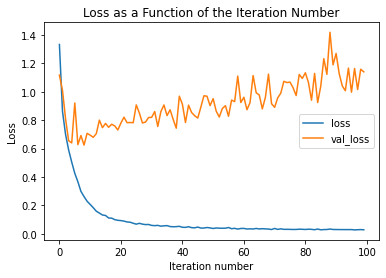

In [17]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss');
plt.plot(r.history['val_loss'], label='val_loss');
plt.legend();
plt.xlabel('Iteration number');
plt.ylabel('Loss');
plt.title('Loss as a Function of the Iteration Number');

###**6.2) Accuracy:**
* Display the variations of the training and validation accuracy with the number of epochs:

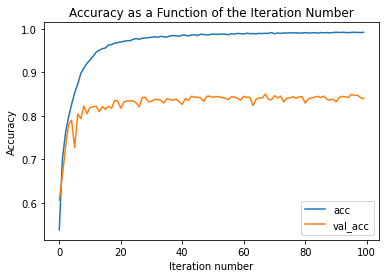

In [18]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc');
plt.plot(r.history['val_accuracy'], label='val_acc');
plt.legend();
plt.xlabel('Iteration number');
plt.ylabel('Accuracy');
plt.title('Accuracy as a Function of the Iteration Number');

###**6.3) Compute the test-data Accuracy:**
* Compute and display the accuracy on the test-data:

In [19]:
# Compute the model accuracy on the test data
accuracy_test_data = model.evaluate(x_test, y_test)
# display the atest-data accuracy
print('-------------------------------------------------------')
print('The test-data accuracy = ' + str(accuracy_test_data[1]))
print('-------------------------------------------------------')

313/313 [==============================] - 1s 3ms/step - loss: 1.1399 - accuracy: 0.8398
-------------------------------------------------------
The test-data accuracy = 0.8398000001907349
-------------------------------------------------------


###**6.4) Confusion Matrix Visualizations:**
* Compute the confusion matrix

Confusion matrix, without normalization
[[867   8  23  23  13   5   3   8  26  24]
 [  4 920   2   2   3   1   1   3   5  59]
 [ 53   2 726  41  39  60  35  24   8  12]
 [ 14   3  37 670  33 152  37  31   9  14]
 [ 12   1  29  33 841  32  11  37   1   3]
 [  9   2  13  86  25 819   9  31   2   4]
 [  7   4  30  55  22  27 834   7   6   8]
 [  7   1  12  26  27  20   2 891   2  12]
 [ 32  20   8   6   4   3   2   5 891  29]
 [  9  25   3   3   3   5   4   3   6 939]]


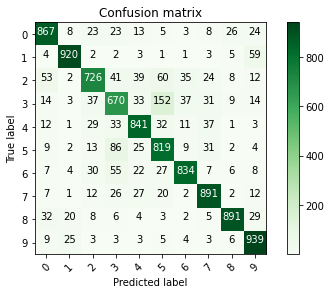

In [20]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  # Display the confusion matrix
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


#--------------------------------------------------------
# Performance visualization:
#--------------------------------------------------------
# prediction 
p_test = model.predict(x_test).argmax(axis=1)
# compute confusuon matrix
cm = confusion_matrix(y_test, p_test)
# visualize the confusion matrix
plot_confusion_matrix(cm, list(range(10)))

###**6.5) Examine some of the misclassified test-data examples:**
*   Display some of the misclassified items from the test data:

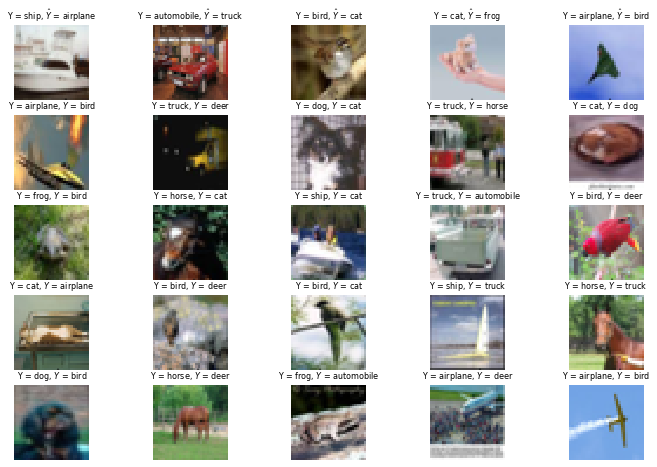

In [21]:
# - Find the indices of all the mis-classified examples
misclassified_idx = np.where(p_test != y_test)[0] # select the index
# setup the subplot grid for the visualized images
 # the suplot grid shape
num_rows = 5
# the number of columns
num_cols = num_visualized_images // num_rows
# setup the subplots axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
# set a seed random number generator for reproducible results
seed(random_state_seed)
# iterate over the sub-plots
for row in range(num_rows):
  for col in range(num_cols):
    # get the next figure axis
    ax = axes[row, col];
    # turn-off subplot axis
    ax.set_axis_off()
    # select a random mis-classified example
    counter = np.random.choice(misclassified_idx)
    # get test image 
    image = np.squeeze(x_test[counter,:])
    # get the true labels of the selected image
    label = labels[y_test[counter]]
    # get the predicted label of the test image
    yhat = labels[p_test[counter]]
    # display the image 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # display the true and predicted labels on the title of tehe image
    ax.set_title('Y = %s, $\hat{Y}$ = %s' % ((label), (yhat)), size = 8)

##**Part 7: Try to improve the model performance using data augmentation:**

* The CNN appears to be over-fitting:
  * Excellent performance on the training data
  * Poor performance on the validation data
  
* In an attempt to address the over-fitting issue, we apply data augmentation:
  * Data augmentation simply means increasing size of the labelled data so that we provide higher number of training and validation examples
  * Some of the popular image augmentation techniques are flipping, translation, rotation, scaling, changing brightness, adding noise, etc.
  * Next, we apply data augmentation using the folloing image transformation:
    * Horizontal image shift by 10% or less
    * Vertical image shift by 10% or less
    * Horizontal image flip

In [22]:
#-------------------------------------------------------------------------------
# 7) Apply data augmentation:
#-------------------------------------------------------------------------------
# Set the batch size
batch_size = 32
#-------------------------------------------------------------------------------
# 7.1) Define the data generator: defines the way the training images are augmented
#-------------------------------------------------------------------------------
# - width_shift_range=0.1
# - height_shift_range=0.1
# - horizontal_flip=True
#-------------------------------------------------------------------------------
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# data generator
train_generator = data_generator.flow(x_train, y_train, batch_size)
# compute the steps per epochs
steps_per_epoch = x_train.shape[0] // batch_size

#-------------------------------------------------------------------------------
# 7.2) Fit the model using the augmented data
#-------------------------------------------------------------------------------
# Note: if you run this AFTER calling the previous model.fit(), 
#   - It will CONTINUE training where it left off
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
# - set the number of epochs
num_epochs = 100
# train the model
r = model.fit(train_generator, validation_data=(x_test, y_test), 
              steps_per_epoch=steps_per_epoch, 
              epochs=num_epochs)

Epoch 1/100
1562/1562 [==============================] - 30s 19ms/step - loss: 0.5678 - accuracy: 0.8228 - val_loss: 0.4802 - val_accuracy: 0.8533
Epoch 2/100
1562/1562 [==============================] - 29s 19ms/step - loss: 0.4467 - accuracy: 0.8572 - val_loss: 0.4519 - val_accuracy: 0.8543
Epoch 3/100
1562/1562 [==============================] - 29s 19ms/step - loss: 0.4121 - accuracy: 0.8672 - val_loss: 0.4935 - val_accuracy: 0.8491
Epoch 4/100
1562/1562 [==============================] - 29s 19ms/step - loss: 0.3962 - accuracy: 0.8713 - val_loss: 0.4293 - val_accuracy: 0.8599
Epoch 5/100
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3654 - accuracy: 0.8788 - val_loss: 0.4271 - val_accuracy: 0.8633
Epoch 6/100
1562/1562 [==============================] - 29s 19ms/step - loss: 0.3589 - accuracy: 0.8803 - val_loss: 0.4297 - val_accuracy: 0.8596
Epoch 7/100
1562/1562 [==============================] - 29s 19ms/step - loss: 0.3476 - accuracy: 0.8831 - val_loss: 0

##**Part 8: Evaluate the re-trained CNN model using data augmentation:**
* Evaluate the trained CNN model on the test data using different evaluation metrics:
   * Loss function
   * Accuracy
   * Confusion matrix.

###**8.1) Loss function:**
* Display the variations of the training and validation loss function with the number of epochs:

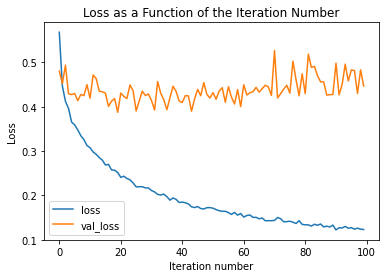

In [23]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss');
plt.plot(r.history['val_loss'], label='val_loss');
plt.legend();
plt.xlabel('Iteration number');
plt.ylabel('Loss');
plt.title('Loss as a Function of the Iteration Number');

###**8.2) Accuracy:**
* Display the variations of the training and validation accuracy with the number of epochs:

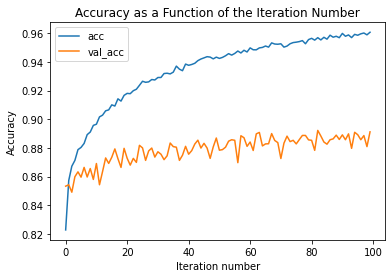

In [24]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc');
plt.plot(r.history['val_accuracy'], label='val_acc');
plt.legend();
plt.xlabel('Iteration number');
plt.ylabel('Accuracy');
plt.title('Accuracy as a Function of the Iteration Number');

###**8.3) Compute the test-data Accuracy:**
* Compute and display the accuracy on the test-data:

In [25]:
# Compute the model accuracy on the test data
accuracy_test_data = model.evaluate(x_test, y_test)
# display the atest-data accuracy
print('-------------------------------------------------------')
print('The test-data accuracy = ' + str(accuracy_test_data[1]))
print('-------------------------------------------------------')

313/313 [==============================] - 1s 3ms/step - loss: 0.4466 - accuracy: 0.8912
-------------------------------------------------------
The test-data accuracy = 0.8912000060081482
-------------------------------------------------------


###**8.4) Confusion Matrix Visualizations:**
* Compute the confusion matrix

Confusion matrix, without normalization
[[904  12  18   5   2   3   6   5  26  19]
 [  1 966   0   3   1   0   0   0   3  26]
 [ 38   1 832  23  27  26  36  11   2   4]
 [  8   6  31 747  40  85  44  17  11  11]
 [  6   1  25  15 902  13  18  16   3   1]
 [  6   1  18  78  28 827  16  21   1   4]
 [  4   2  18  18   7   5 940   3   1   2]
 [ 10   3   9  15  21   8   0 927   3   4]
 [ 23  16   2   3   3   0   2   2 929  20]
 [  5  40   5   2   0   1   0   1   8 938]]


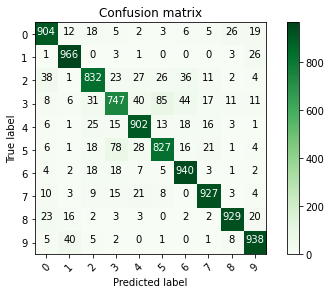

In [26]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  # display the confusion matrix
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


# prediction 
p_test = model.predict(x_test).argmax(axis=1)
# compute confusuon matrix
cm = confusion_matrix(y_test, p_test)
# visualie the confusion matrix
plot_confusion_matrix(cm, list(range(10)))



###**8.5) Examine some of the misclassified test-data examples:**
*   Display some of the misclassified items from the test data:

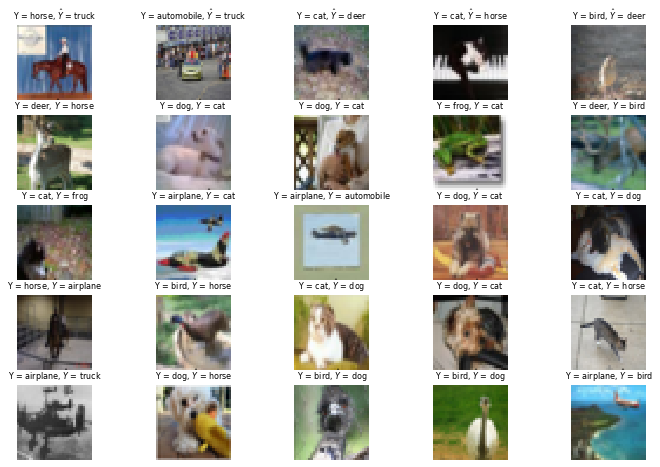

In [27]:
# - Find the indices of all the mis-classified examples
misclassified_idx = np.where(p_test != y_test)[0] # select the index
# setup the subplot grid for the visualized images
 # the suplot grid shape
num_rows = 5
# the number of columns
num_cols = num_visualized_images // num_rows
# setup the subplots axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
# set a seed random number generator for reproducible results
seed(random_state_seed)
# iterate over the sub-plots
for row in range(num_rows):
  for col in range(num_cols):
    # get the next figure axis
    ax = axes[row, col];
    # turn-off subplot axis
    ax.set_axis_off()
    # select a random mis-classified example
    counter = np.random.choice(misclassified_idx)
    # get test image 
    image = np.squeeze(x_test[counter,:])
    # get the true labels of the selected image
    label = labels[y_test[counter]]
    # get the predicted label of the test image
    yhat = labels[p_test[counter]]
    # display the image 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # display the true and predicted labels on the title of tehe image
    ax.set_title('Y = %s, $\hat{Y}$ = %s' % ((label), (yhat)), size = 8)

##**Part 9: Display a final message after successful execution completion:** **bold text**

In [ ]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ 
      str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))



The CIFAR-10 dataset. (April 6th, 2021). https://www.cs.toronto.edu/~kriz/cifar.html

Park Chansung. (April 6th, 2021). CIFAR-10 Image Classification in TensorFlow. https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

Jason Brownlee. (April 6th, 2021). 
How to Develop a CNN From Scratch for CIFAR-10 Photo Classification. 
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

Tensorflow. (April 6th, 2021). Convolutional Neural Network (CNN). https://www.tensorflow.org/tutorials/images/cnn

Aarya Brahmane. (April 6th, 2021). Deep Learning with CIFAR-10
Image Classification using CNN. https://towardsdatascience.com/deep-learning-with-cifar-10-image-classification-64ab92110d79

Abhijeet Kumar. (April 6th, 2021). Achieving 90% accuracy in Object Recognition Task on CIFAR-10 Dataset with Keras: Convolutional Neural Networks
https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

Konstantinos Siaterlis. (April 6th, 2021). Convolutional NN with Keras Tensorflow on CIFAR-10 Dataset, Image Classification. https://medium.com/@siakon/convolutional-nn-with-keras-tensorflow-on-cifar-10-dataset-image-classification-d3aad44691bd

Mia Morton. (April 6th, 2021). Experimental Process: Completing a Convolutional Neural Network to Classify the CIFAR 10 Dataset. https://medium.com/@704/experimental-process-in-completing-convolutional-neural-network-to-classify-the-cifar-10-dataset-8de699b82b8d

Kaggle. (APril 6th, 2021). CIFAR-10 - Object Recognition in Images
Identify the subject of 60,000 labeled images. https://www.kaggle.com/c/cifar-10/discussion/40237













